In [1]:
#we are importing all the libraries we would like to use.
#including data stores for stopwords and such
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
from sklearn.utils import shuffle
%matplotlib inline  

In [2]:
#this reads the csv data sets directly from the source provided.
mails = pd.read_csv('datasets/set_1.csv', encoding = 'latin-1')
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#this removes the resultant columns that we have no use for.
mails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
mails.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#we rename the columns to more human readable names.
mails.rename(columns = {'v1': 'labels', 'v2': 'message'}, inplace = True)
mails.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#this displays the distribution of our data over the distinctions available i.e ham and spam.
mails['labels'].value_counts()

ham     848
spam    152
Name: labels, dtype: int64

In [6]:
#this maps the ham and spam texts to identities that we can use easily in processing.
mails['label'] = mails['labels'].map({'ham': 0, 'spam': 1})
mails.head()

,labels,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
#this removes an unwanted column that is a result of previous interaction
mails.drop(['labels'], axis = 1, inplace = True)
mails.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:

#split the data into training and testing sets
#initializing empty lists to hold training and testing data respectively
trainIndex, testIndex = list(), list()
for i in range(mails.shape[0]):
    if np.random.uniform(0, 1) < 0.75:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = mails.loc[trainIndex]
testData = mails.loc[testIndex]

In [9]:
#this restructures the structure of the columns in question, so as to allow for uniform processing for the training data set
trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

,message,label
0,Ok lar... Joking wif u oni...,0
1,Free entry in 2 a wkly comp to win FA Cup fina...,1
2,"Nah I don't think he goes to usf, he lives aro...",0
3,FreeMsg Hey there darling it's been 3 week's n...,1
4,Even my brother is not like to speak with me. ...,0


In [10]:
#this restructures the structure of the columns in question, so as to allow for uniform processing for the testing data set

testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)
testData.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,U dun say so early hor... U c already then say...,0
2,WINNER!! As a valued network customer you have...,1
3,Had your mobile 11 months or more? U R entitle...,1
4,URGENT! You have won a 1 week FREE membership ...,1


In [11]:
#this shows the distribution of the training dataset over ham and spam
trainData['label'].value_counts()

0    638
1    110
Name: label, dtype: int64

In [12]:
#this shows the distribution of the testing dataset over ham and spam
testData['label'].value_counts()

0    210
1     42
Name: label, dtype: int64

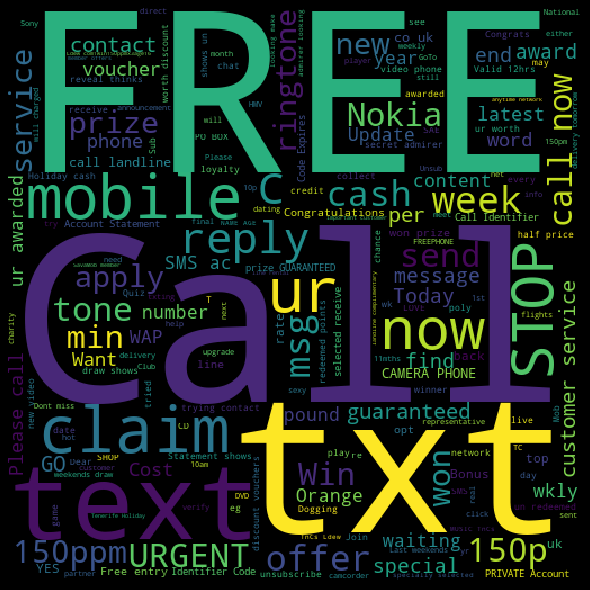

In [13]:
#visual representation of the most salient words.
#this is the visulization for the spam.
spam_words = ' '.join(list(mails[mails['label'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

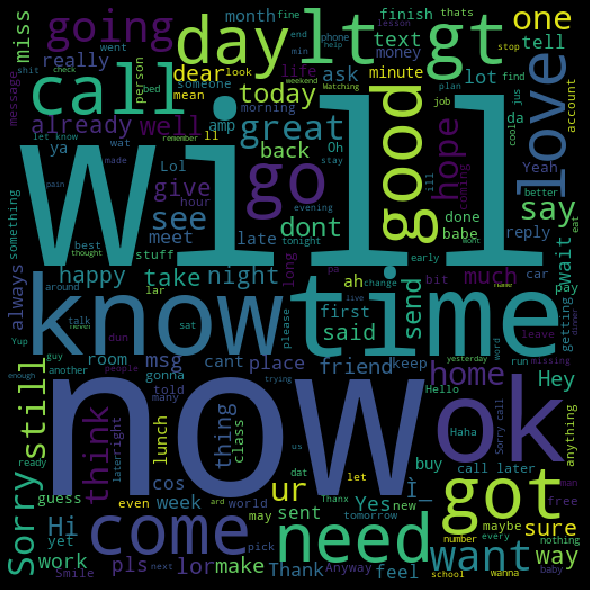

In [14]:
#Visualize the ham data
ham_words = ' '.join(list(mails[mails['label'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [15]:
#sample the top training data
trainData.head()

,message,label
0,Ok lar... Joking wif u oni...,0
1,Free entry in 2 a wkly comp to win FA Cup fina...,1
2,"Nah I don't think he goes to usf, he lives aro...",0
3,FreeMsg Hey there darling it's been 3 week's n...,1
4,Even my brother is not like to speak with me. ...,0


In [16]:
#observe the distribution of the text over ham or spam
trainData['label'].value_counts()

0    638
1    110
Name: label, dtype: int64

In [17]:
#observe the test data
testData.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,U dun say so early hor... U c already then say...,0
2,WINNER!! As a valued network customer you have...,1
3,Had your mobile 11 months or more? U R entitle...,1
4,URGENT! You have won a 1 week FREE membership ...,1


In [18]:
#observe the distribution of test data
testData['label'].value_counts()

0    210
1     42
Name: label, dtype: int64

In [19]:
#tokenizing and processing the words harnessed.
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    #lower case all the letters in the message.
    if lower_case:
        message = message.lower()
    #break down the words into tokens.
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
#     print(words)
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        #fetch all words that do not have meaning in this case: stopwords.
        sw = stopwords.words('english')
        #create a list of words containing only the words without stopwords
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
#     print(words)
    return words

In [20]:
#this whole function is the bayesian classifier. the calc_prob calculates the probability of a word bein either spam or ham.
#the classify function returns true if the threshold for it being spam has been reached. otherwise, it is false, meaning ham.
class SpamClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        #initialize the data to be used for processing. i.e training data.
        self.mails, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        #this function trains our model.
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
         # initialize variables to calculate probabilities. i.e probability of being ham or spam. using normal probabilistic theory.
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            #if word is spam create a dictionary with the key being the word and the value being the probability of it being spam.
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            #if word is ham, create a dictionary with the key being the ham word and the value being its probability of being ham.
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.mails[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels[i]:
                    self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                    self.spam_words += 1
                else:
                    self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                    self.ham_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels[i]:
                    self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                else:
                    self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                if self.method == 'tf-idf':
                    pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                else:
                    pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                if self.method == 'tf-idf':
                    pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                else:
                    pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
        return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [21]:
def metrics(labels, predictions):#Confusion matrix function
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [22]:
sc_tf_idf = SpamClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

Precision:  0.875
Recall:  0.3333333333333333
F-score:  0.48275862068965514
Accuracy:  0.8809523809523809


In [23]:
sc_bow = SpamClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'], preds_bow)

Precision:  0.7777777777777778
Recall:  0.16666666666666666
F-score:  0.2745098039215686
Accuracy:  0.8531746031746031


In [24]:
pm = process_message('I cant pick the phone right now. Pls send a message')
if(sc_tf_idf.classify(pm)):
    print("Message is spam")
else:
    print("Message is Ham")

Message is Ham


In [25]:
pm = process_message('Congratulations ur awarded $500 winner free ')
if(sc_tf_idf.classify(pm)):
    print("Message is spam")
else:
    print("Message is Ham")

Message is spam
